C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Cluster centroids:
 [[5.52857143 4.04285714 1.47142857 0.28571429]
 [6.02777778 2.73333333 5.02777778 1.79444444]
 [4.67894737 3.08421053 1.37894737 0.2       ]
 [6.00714286 2.85       4.44285714 1.4       ]
 [6.61666667 3.07916667 5.5625     2.1375    ]
 [5.         2.3        3.275      1.025     ]
 [5.58947368 2.63157895 4.00526316 1.22105263]
 [5.1125     3.52083333 1.525      0.27083333]
 [7.54       3.15       6.39       2.09      ]
 [6.65454545 3.04545455 4.66363636 1.47272727]]


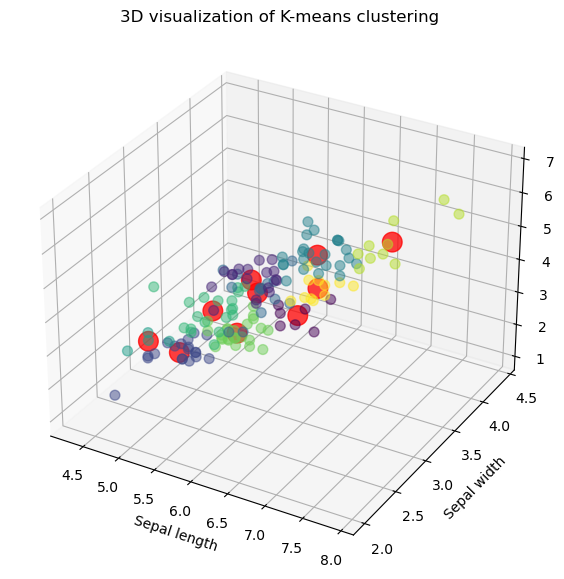

Final data with labels:
 [[1.00000000e+00 7.82385132e-01 1.88617946e-04 ... 3.14725531e-08
  5.83077713e-04 1.00000000e+00]
 [1.00000000e+00 4.73524786e-01 1.98840163e-04 ... 1.99078841e-08
  4.63907005e-04 1.00000000e+00]
 [1.00000000e+00 4.88294420e-01 1.00066467e-04 ... 7.02247582e-09
  2.27352640e-04 1.00000000e+00]
 ...
 [1.00000000e+00 7.97891962e-05 8.32760445e-01 ... 2.82479302e-01
  7.43916526e-01 3.00000000e+00]
 [1.00000000e+00 3.80141910e-05 6.47834271e-01 ... 2.36655448e-01
  4.58652329e-01 3.00000000e+00]
 [1.00000000e+00 2.38164006e-04 9.54714828e-01 ... 1.07512302e-01
  6.47612465e-01 3.00000000e+00]]
Shape of final data: (150, 12)
Train data shape: (120, 12)
Test data shape: (30, 12)
Initial weights:
 [[-2.83076793 -2.34199597  0.60351745 -5.72110903 -6.50792834 -2.82084886
   4.29808327 -1.69863223 -0.81704142 -7.4069711  -1.50471991]
 [ 4.96754227 -0.52008876  4.21966918 -7.12672039 -5.84433348 -2.55190746
  -8.59168638  0.73601476  4.20582797 -3.97210645  4.57625636

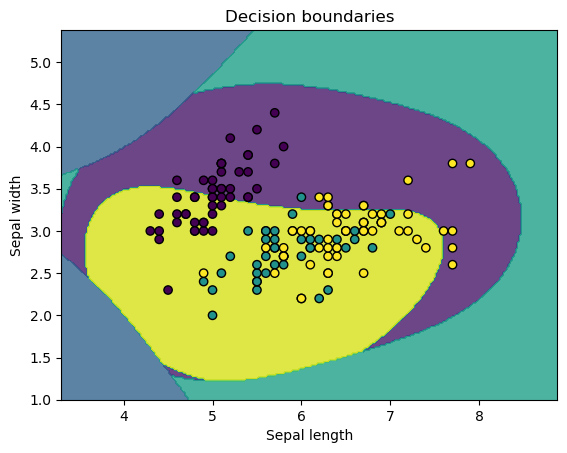

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
import numpy as np
from sklearn.cluster import KMeans
import sklearn.metrics as cma
import math, random

# Load the iris dataset
iris = datasets.load_iris()
X = iris.data
y = list(iris.target + 1)

hidden_nodes = 10

# Perform k-means clustering
est = KMeans(n_clusters=hidden_nodes, random_state=0)
est.fit(X)
cluster_centers = est.cluster_centers_

print("Cluster centroids:\n", cluster_centers)

# 3D visualization of the clusters
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=est.labels_.astype(float), s=50, alpha=0.5, cmap='viridis')
ax.scatter(cluster_centers[:, 0], cluster_centers[:, 1], cluster_centers[:, 2], c='red', s=200, alpha=0.75)
ax.set_xlabel('Sepal length')
ax.set_ylabel('Sepal width')
ax.set_zlabel('Petal length')
plt.title('3D visualization of K-means clustering')
plt.show()

# Transform data into higher-dimensional space
f_res = []
for i in X:
    res = []
    for j in cluster_centers:
        temp = []
        for x, z in zip(i, j):
            temp.append(x - z)
        temp = np.array(temp)
        res.append(math.exp(-np.dot(temp, temp.T) / 2))
    f_res.append(res)

# Prepare the final data with labels
final_data = np.full((150, hidden_nodes + 2), 0.0)
eta = .1

for k in range(150):
    temp = [1]
    temp = np.concatenate((temp, f_res[k], [y[k]]))
    final_data[k] = temp

print("Final data with labels:\n", final_data)
print("Shape of final data:", final_data.shape)

# Split data into training and testing sets
train_data = np.zeros(shape=(120, hidden_nodes + 2))
test_data = np.zeros(shape=(30, hidden_nodes + 2))
l = k = 0
for i in range(150):
    if i % 5 == 0:
        test_data[l] = final_data[i]
        l += 1
    else:
        train_data[k] = final_data[i]
        k += 1

print("Train data shape:", train_data.shape)
print("Test data shape:", test_data.shape)

# Initialize weights
u_weights = np.array([[random.uniform(-10, 10) for _ in range(hidden_nodes + 1)],
                      [random.uniform(-10, 10) for _ in range(hidden_nodes + 1)],
                      [random.uniform(-10, 10) for _ in range(hidden_nodes + 1)]])

print("Initial weights:\n", u_weights)

# Train the model
def train_model(label: int) -> None:
    print('Training for class:', label)
    l_weights = np.full((3, (hidden_nodes + 1)), 0.0)
    print('Initial l_weights:', l_weights[label - 1])
    print('Initial u_weights:', u_weights[label - 1])

    count = 20
    while count > 0:
        print("Iteration:", 20 - count)
        for i in train_data:
            pdt = np.dot(i[:-1], u_weights[label - 1])
            if (i[-1] != label and pdt >= 0):
                u_weights[label - 1] = u_weights[label - 1] - eta * i[:-1]
            if (i[-1] == label and pdt < 0):
                u_weights[label - 1] = u_weights[label - 1] + eta * i[:-1]
        count -= 1

def predict_model(test_data: np.ndarray) -> None:
    pred = [None] * 30
    for idx, i in enumerate(test_data):
        t_pdt_1 = np.dot(i[:hidden_nodes + 1], u_weights[0])
        t_pdt_2 = np.dot(i[:hidden_nodes + 1], u_weights[1])
        t_pdt_3 = np.dot(i[:hidden_nodes + 1], u_weights[2])
        
        if t_pdt_1 >= 0:
            pred[idx] = 1
        elif t_pdt_2 >= 0:
            pred[idx] = 2
        elif t_pdt_3 >= 0:
            pred[idx] = 3
        else:
            pred[idx] = 0
    
    cm = cma.confusion_matrix(test_data[:, -1], pred)
    print('Confusion matrix for the model:\n', cm)
    print('Predictions:', pred)

# Train the model for each class
train_model(1)
train_model(2)
train_model(3)

print("Final weights learned:\n", u_weights)
predict_model(test_data)

# Visualization of decision boundaries
def plot_decision_boundaries():
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = []
    for i in np.c_[xx.ravel(), yy.ravel()]:
        res = []
        for j in cluster_centers:
            temp = []
            for x, z in zip(i, j[:2]):
                temp.append(x - z)
            temp = np.array(temp)
            res.append(math.exp(-np.dot(temp, temp.T) / 2))
        res = [1] + res
        t_pdt_1 = np.dot(res, u_weights[0])
        t_pdt_2 = np.dot(res, u_weights[1])
        t_pdt_3 = np.dot(res, u_weights[2])
        
        if t_pdt_1 >= 0:
            Z.append(1)
        elif t_pdt_2 >= 0:
            Z.append(2)
        elif t_pdt_3 >= 0:
            Z.append(3)
        else:
            Z.append(0)
    Z = np.array(Z).reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.viridis)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.viridis)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.title('Decision boundaries')
    plt.show()

plot_decision_boundaries()


In [ ]:
import tkinter as tk
from tkinter import ttk
from tkinter import messagebox
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

class RBFSimulator:
    def __init__(self, root):
        self.root = root
        self.root.title("Radial Basis Function Simulator")
        
        self.data_points = tk.Text(root, height=10, width=50)
        self.data_points.grid(row=0, column=0, padx=10, pady=10)
        
        self.basis_function = tk.Text(root, height=10, width=50)
        self.basis_function.grid(row=1, column=0, padx=10, pady=10)
        
        self.training_points = ttk.Treeview(root, columns=("Sl No", "X", "Y"), show="headings")
        self.training_points.heading("Sl No", text="Sl No")
        self.training_points.heading("X", text="X")
        self.training_points.heading("Y", text="Y")
        self.training_points.grid(row=0, column=1, rowspan=2, padx=10, pady=10)
        
        self.parameters_frame = tk.Frame(root)
        self.parameters_frame.grid(row=2, column=0, padx=10, pady=10)
        
        tk.Label(self.parameters_frame, text="Number of Centers:").grid(row=0, column=0)
        self.num_centers = tk.Entry(self.parameters_frame)
        self.num_centers.grid(row=0, column=1)
        self.num_centers.insert(0, "12")
        
        tk.Label(self.parameters_frame, text="Standard Deviation:").grid(row=1, column=0)
        self.std_dev = tk.Entry(self.parameters_frame)
        self.std_dev.grid(row=1, column=1)
        self.std_dev.insert(0, "0.5")
        
        self.controls_frame = tk.Frame(root)
        self.controls_frame.grid(row=2, column=1, padx=10, pady=10)
        
        tk.Button(self.controls_frame, text="Reset", command=self.reset).grid(row=0, column=0, padx=5)
        tk.Button(self.controls_frame, text="Redraw", command=self.redraw).grid(row=0, column=1, padx=5)
        tk.Button(self.controls_frame, text="Go", command=self.compute_rbf).grid(row=0, column=2, padx=5)
        
    def reset(self):
        self.data_points.delete("1.0", tk.END)
        self.basis_function.delete("1.0", tk.END)
        for item in self.training_points.get_children():
            self.training_points.delete(item)
        self.num_centers.delete(0, tk.END)
        self.num_centers.insert(0, "12")
        self.std_dev.delete(0, tk.END)
        self.std_dev.insert(0, "0.5")
    
    def redraw(self):
        try:
            num_centers = int(self.num_centers.get())
            std_dev = float(self.std_dev.get())
        except ValueError:
            messagebox.showerror("Input Error", "Invalid input for Number of Centers or Standard Deviation.")
            return
        
        # For simplicity, we'll just plot some random points
        x = np.random.rand(100)
        y = np.random.rand(100)
        
        plt.scatter(x, y)
        plt.title("Random Points")
        plt.xlabel("X")
        plt.ylabel("Y")
        plt.show()
    
    def compute_rbf(self):
        try:
            num_centers = int(self.num_centers.get())
            std_dev = float(self.std_dev.get())
        except ValueError:
            messagebox.showerror("Input Error", "Invalid input for Number of Centers or Standard Deviation.")
            return
        
        data = self.data_points.get("1.0", tk.END).strip().split("\n")
        if not data:
            messagebox.showerror("Input Error", "No data points provided.")
            return
        
        data_points = np.array([list(map(float, point.split())) for point in data])
        kmeans = KMeans(n_clusters=num_centers)
        kmeans.fit(data_points)
        centers = kmeans.cluster_centers_
        
        self.basis_function.delete("1.0", tk.END)
        self.basis_function.insert(tk.END, str(centers))
        
        for i, (x, y) in enumerate(data_points):
            self.training_points.insert("", "end", values=(i + 1, x, y))

if __name__ == "__main__":
    root = tk.Tk()
    app = RBFSimulator(root)
    root.mainloop()


In [ ]:
import numpy as np
import time
import re
import sys
import math
import matplotlib.pyplot as plt

np.set_printoptions(threshold=sys.maxsize, suppress=True)
np.random.seed(1)


def inputXFromFile(filename, sampleSize):  # SampleSize given for performace enhancement
    """Inputs the training examples X"""
    inputArray = np.zeros(shape=(sampleSize, 784))  # 784 = pixels of each image
    with open(filename, "r") as file:
        for i in range(sampleSize):
            inputList = []
            for _ in range(44):  # 44 lines of each example in file
                line = file.readline().strip("[").replace("]", "")
                inputList += line.split()
            inputArray[i] = inputList
    # print("X Input Size:", inputArray.shape)
    return np.divide(inputArray, 255)


def inputYFromFile(filename, sampleSize):
    """Inputs the training examples Y"""
    # for each row, we want a column like [0 0 1 0 ...]
    inputArray = np.zeros(shape=(sampleSize, 10))
    with open(filename, "r") as file:
        for i in range(sampleSize):
            value = file.readline()
            if not value:
                break
            inputArray[i][int(value)] = 1
    # print("Y input size:", inputArray.shape)
    return inputArray


def kMeansClustering(K, sampleData):
    """Find K cluster centeriods of the passed sampleData
    """
    # Randomly select K examples as starting point for centeriods
    randIndices = np.random.choice(sampleData.shape[0], size=K, replace=False)
    centeriods = sampleData[randIndices, :]

    dataSize = 10000
    data = sampleData[:dataSize]
    for i in range(15):
        centeriodSums = np.zeros(shape=centeriods.shape)
        centeriodSumsCounter = np.zeros(shape=K)

        # 1. Allocate a training example to its nearest centriod
        for x in data:
             # Get index of closest centeriod to X (minimum of ||C - X||)
            index = np.argmin(np.square(centeriods - x).sum(axis=1))
            centeriodSums[index] += x
            centeriodSumsCounter[index] += 1
        
        # 2. Reassign the centriods to new means
        for i in range(K):
            centeriods[i] = centeriodSums[i] / centeriodSumsCounter[i]
    
    return centeriods

class Network:
    def __init__(self):
        self.XSize = 0
        self.HSize = 300
        self.OSize = 10
        self.X = []
        self.C = []
        self.Y = []
        self.W = []
        # self.B = np.random.uniform(-1, 1, (self.OSize))
        self.trainErrors = []
        self.testErrors = []

    def loadData(self, filenameX, filenameY, sampleSize):
        """Loads training/test data\n
        Parameters:\n
        - filenameX: filename for X features\n
        - filenameY: filename for Y (labels)\n
        - sampleSize: number of examples in dataset
        """
        self.X = inputXFromFile(filenameX, sampleSize)
        self.Y = inputYFromFile(filenameY, sampleSize)
        self.XSize = sampleSize

    def initializeCenters(self, K, useKMeans):
        """Initializes Centers (for RBF neurons in hidden layer)\n
        Parameters:\n
        - useKMeans: Set to true to use kMeans clustering to get centroids
        """
        print("Initialzing Centers...")
        self.HSize = K      # Since centriods is equal to hidden layer neurons
        if useKMeans:
            self.C = kMeansClustering(K, self.X)
        else:
            self.C = self.X[: self.HSize]

    def train(self, epochs=1, learnRate=0.5, K=300, useKMeans=False):
        """Trains the Network\n
        Parameters:\n
        - epochs: Number of epochs or trainings on entire dataset
        - learnRate: Learning Rate
        - K: Number of centers/centroids
        - useKMeans: Set to true to use kMeans clustering to get centroids
        """
        # Initialzing centers and weights
        self.initializeCenters(K, useKMeans)
        self.W = np.random.uniform(-1, 1, (self.HSize, self.OSize))

        self.trainErrors = np.zeros(shape=self.XSize)  # Preallocating numpy array
        print("Training...")
        for _ in range(epochs):
            # Take each data sample from the inputData
            for i, x in enumerate(self.X):
                HLayer = rbf(x, self.C)
                # Multiply the weights to get output for each data
                output = np.dot(HLayer, self.W)  # + self.B
                error = output - self.Y[i]
                self.W = self.W - (learnRate * np.outer(HLayer, error))
                # self.B = self.B - (learnRate * error)
                self.trainErrors[i] = 0.5 * sum(error ** 2)
        print("Training done")
        # Saving weights and centers in a file
        np.save("weights", self.W)
        np.save("centers", self.C)

    def predict(self):
        """Predicts using the Network by the set parameters (weight and
        centers) and displays the accuracy
        """
        self.testErrors = np.zeros(shape=self.XSize)  # Preallocating numpy array
        print("Prediciting...")
        totalAvg = count = correctCount = 0.0
        # Take each data sample from the inputData
        for count, x in enumerate(self.X):
            HLayer = rbf(x, self.C)
            output = np.dot(HLayer, self.W)  # + self.B
            o = np.argmax(output)
            y = np.argmax(self.Y[count])
            if o == y:
                correctCount += 1

            error = output - self.Y[count]
            self.testErrors[count] = 0.5 * sum(error ** 2)

        totalAvg = (correctCount * 100.0) / (count + 1)
        print(f"Total Avg. Accuracy: {totalAvg} %")


def rbf(x, C, beta=0.05):
    """Radial Basis Function\n
    Parameters:\n
    x: a training example
    C: centers of used for the hidden layer
    """
    H = np.zeros(shape=(np.shape(C)[0]))
    for i, c in enumerate(C):  # For each neuron in H layer
        H[i] = math.exp((-1 * beta) * np.dot(x - c, x - c))
    return H


def plotLearningCurves(trainErrors, testErrors):
    """Plots the learning curves of both training cost and test cost
    """
    # Averaging over the first {avgSize} examples
    avgSize = 100
    if type(trainErrors) is np.ndarray:     # if trainError data is available
        Jtrain = trainErrors.reshape(-1, avgSize).mean(axis=1)
        plt.plot(Jtrain, label='Training Cost')
    Jtest = testErrors.reshape(-1, avgSize).mean(axis=1)
    plt.plot(Jtest, label='Test Cost')
    plt.xlabel(f"Data examples in {avgSize}s")
    plt.ylabel("Cost")
    plt.show()


#######     MAIN    ######
if __name__ == "__main__":
    start = time.time()
    trainDataSize = 60000
    testDataSize = 10000
    
    myNetwork = Network()
    while True:
        print("1. Train the RBF Network\n2. Predict using the RBF Network")
        userInput = input("Choose your option: ")
        if userInput == "1":
            print("Importing data for training...")
            startTime = time.time()
            myNetwork.loadData("C:\\Users\\User\\OneDrive\\Desktop\\1MDS\\train.txt", "C:\\Users\\User\\OneDrive\\Desktop\\1MDS\\train-labels.txt", trainDataSize)
            print(
                f"{trainDataSize} training examples imported in {time.time()-startTime:.2f} sec"
            )
            
            startTrainingTime = time.time()
            myNetwork.train(epochs=1, learnRate=0.3, K=300, useKMeans=False)
            print(f"Training took: {time.time()-startTrainingTime:.2f} sec")
        elif userInput == "2":
            # Loading centers and weights from save file
            filename = input("Enter file name containing weights (default: weights.npy): ")
            myNetwork.W = np.load(filename)
            myNetwork.C = np.load("centers.npy")

            print("Importing data for testing...")
            myNetwork.loadData("C:\\Users\\User\\OneDrive\\Desktop\\1MDS\\test.txt", "C:\\Users\\User\\OneDrive\\Desktop\\1MDS\\test-labels.txt", testDataSize)
            myNetwork.predict()
            # Plotting the errors of the first 10000 examples
            plotLearningCurves(myNetwork.trainErrors[:10000], myNetwork.testErrors[:10000])
        else:
            break
    print("Program exited.")


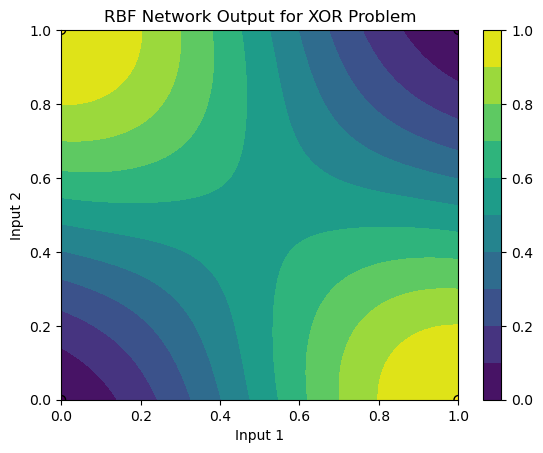

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import lstsq

# XOR input-output pairs
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])
y = np.array([0, 1, 1, 0])

# Define the Gaussian RBF function
def gaussian_rbf(x, c, s):
    return np.exp(-np.linalg.norm(x - c)**2 / (2 * s**2))

# Define the RBF Network
class RBFNetwork:
    def __init__(self, input_dim, num_centers, output_dim):
        self.input_dim = input_dim
        self.num_centers = num_centers
        self.output_dim = output_dim
        
        # Initialize RBF centers (here we use the XOR inputs as centers)
        self.centers = X.copy()
        self.sigma = 0.5  # Fixed sigma for all RBFs
        
        # Initialize weights
        self.weights = np.random.randn(self.num_centers, self.output_dim)
    
    def _basis_function(self, x):
        return np.array([gaussian_rbf(x, c, self.sigma) for c in self.centers])
    
    def _interpolate(self, x):
        return self._basis_function(x).dot(self.weights)
    
    def train(self, X, y):
        G = np.zeros((X.shape[0], self.num_centers))
        for i, x in enumerate(X):
            G[i, :] = self._basis_function(x)
        
        # Solve for weights using least squares
        self.weights, _, _, _ = lstsq(G, y)
    
    def predict(self, X):
        y_pred = np.zeros(X.shape[0])
        for i, x in enumerate(X):
            y_pred[i] = self._interpolate(x)
        return y_pred

# Train the RBF network
rbf_net = RBFNetwork(input_dim=2, num_centers=4, output_dim=1)
rbf_net.train(X, y)

# Generate continuous input data and evaluate the RBF network
x_continuous = np.linspace(0, 1, 100)
y_continuous = np.linspace(0, 1, 100)
X_continuous, Y_continuous = np.meshgrid(x_continuous, y_continuous)
Z_continuous = np.zeros_like(X_continuous)

for i in range(X_continuous.shape[0]):
    for j in range(X_continuous.shape[1]):
        Z_continuous[i, j] = rbf_net.predict(np.array([[X_continuous[i, j], Y_continuous[i, j]]]))

# Plot the results
plt.contourf(X_continuous, Y_continuous, Z_continuous, levels=np.linspace(0, 1, 11), cmap='viridis')
plt.colorbar()
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='viridis')
plt.title('RBF Network Output for XOR Problem')
plt.xlabel('Input 1')
plt.ylabel('Input 2')
plt.show()
